<a href="https://colab.research.google.com/github/lobasfs/-ML-/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D0%BE_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%BC%D1%83_ML_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install openpyxl
#!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Считываем файл
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 214 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    Unnamed: 0                int64  
 1    IC50, mM                  float64
 2    CC50, mM                  float64
 3    SI                        float64
 4    MaxAbsEStateIndex         float64
 5    MaxEStateIndex            float64
 6    MinAbsEStateIndex         float64
 7    MinEStateIndex            float64
 8    qed                       float64
 9    SPS                       float64
 10   MolWt                     float64
 11   HeavyAtomMolWt            float64
 12   ExactMolWt                float64
 13   NumValenceElectrons       int64  
 14   NumRadicalElectrons       int64  
 15   MaxPartialCharge          float64
 16   MinPartialCharge          float64
 17   MaxAbsPartialCharge       float64
 18   MinAbsPartialCharge       float64
 19   FpDensityMorgan1          float64
 20   FpDens

In [ ]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Заведем новый DataFrame, чтобы не загружать каждый раз в Colab
df_copy = df.copy()
# и удалим ненужный столбец с порядковым номером строк
df_copy = df_copy.drop('Unnamed: 0', axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [ ]:
df_copy.describe(include = "all")


,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# Выведим на экран пропуски и отсортируем их
pd.options.display.min_rows = 212
df_copy.isnull().sum().sort_values(ascending=False)

,0
MinAbsPartialCharge,3
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MRLOW,3
BCUT2D_MRHI,3
BCUT2D_LOGPLOW,3
BCUT2D_LOGPHI,3
BCUT2D_CHGLO,3


In [ ]:
df_copy_nonan = df_copy.copy()
# Cобираем в список колонки с пропусками
cols_with_nan = df_copy_nonan.columns[df_copy_nonan.isna().any()].tolist()
print(len(cols_with_nan))
# Для каждой колонки с пропусками
for col in cols_with_nan:
    df_copy_nonan[col] = df_copy_nonan[col].transform(
        # и заполняем пропуски средним для него значением
        lambda x: x.fillna(x.mean())
    )

# проверим результат
pd.options.display.min_rows = 212
df_copy_nonan.isnull().sum().sort_values(ascending=False)

12


,0
"IC50, mM",0
"CC50, mM",0
SI,0
MaxAbsEStateIndex,0
MaxEStateIndex,0
MinAbsEStateIndex,0
MinEStateIndex,0
qed,0
SPS,0
MolWt,0


In [ ]:
df_copy_nonan.any()

,0
"IC50, mM",True
"CC50, mM",True
SI,True
MaxAbsEStateIndex,True
MaxEStateIndex,True
MinAbsEStateIndex,True
MinEStateIndex,True
qed,True
SPS,True
MolWt,True


In [ ]:
# Датафрейм с нулевыми значениями
df_null = df_copy_nonan.loc[:, ~df_copy_nonan.any()]
df_null

,NumRadicalElectrons,SMR_VSA8,SlogP_VSA9,fr_N_O,fr_SH,fr_azide,fr_barbitur,fr_benzodiazepine,fr_diazo,fr_dihydropyridine,fr_isocyan,fr_isothiocyan,fr_lactam,fr_nitroso,fr_phos_acid,fr_phos_ester,fr_prisulfonamd,fr_thiocyan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Удаление с нулевыми значениями
df_dropped = df_copy_nonan.drop(df_null, axis=1)
df_dropped

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,2,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
5,15.037911,30.075821,2.000000,5.758408,5.758408,0.278083,0.278083,0.711012,28.600000,332.491,...,0,0,0,0,0,0,0,0,0,0
6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,528.869,...,2,0,0,0,0,0,0,0,0,0
7,28.773087,23.593931,0.820000,13.821880,13.821880,0.079845,-0.301260,0.217332,31.333333,695.089,...,0,0,0,0,0,0,0,0,4,0
8,50.057068,153.709268,3.070681,14.171614,14.171614,0.019123,-0.411828,0.187781,29.157895,763.123,...,0,0,0,0,0,0,0,0,0,0
9,6.400847,400.906360,62.633333,6.135893,6.135893,0.239226,0.239226,0.439915,36.400000,468.685,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Удаление дубликатов
df_drop_dublicate = df_dropped.drop_duplicates()
df_drop_dublicate.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,220.726223,586.419908,73.967907,10.893712,10.893712,0.179533,-0.960140,0.577633,29.370350,351.486139,...,0.054696,0.055728,0.012384,0.009288,0.001032,0.001032,0.053664,0.070175,0.208462,0.007224
std,397.172441,633.624464,695.564665,3.284005,3.284005,0.168928,1.567568,0.213316,12.605779,127.388186,...,0.305090,0.263069,0.110649,0.095975,0.032125,0.032125,0.225469,0.255574,1.231428,0.084730
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.515396,99.999345,1.488095,10.006389,10.006389,0.050979,-1.333174,0.442842,18.500000,266.252000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.338355,424.166213,3.900000,12.196496,12.196496,0.123850,-0.419485,0.634372,29.200000,318.373000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,231.373089,891.776925,16.375000,13.178870,13.178870,0.291020,0.007873,0.742483,38.600000,413.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


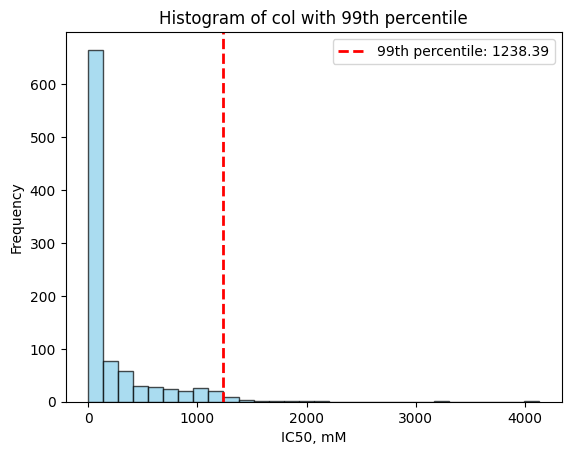

In [ ]:
df_q992 = df_drop_dublicate['IC50, mM'].quantile(0.98)

plt.hist(df_drop_dublicate['IC50, mM'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q992, color='red', linestyle='dashed', linewidth=2, label=f'99th percentile: {df_q992:.2f}')
plt.title('Histogram of col with 99th percentile')
plt.xlabel('IC50, mM')
plt.ylabel('Frequency')
plt.legend()
plt.show()

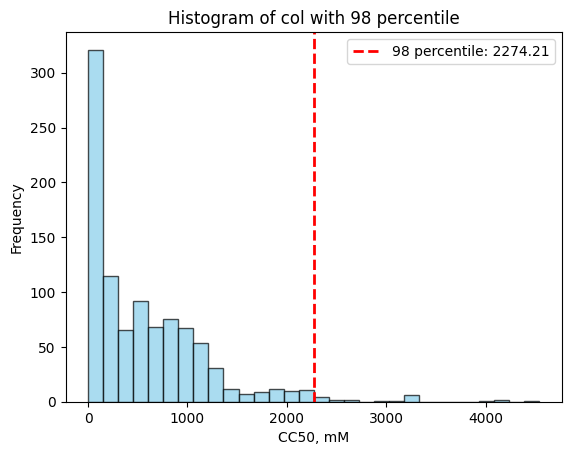

In [ ]:
df_q98 = df_drop_dublicate['CC50, mM'].quantile(0.98)

plt.hist(df_drop_dublicate['CC50, mM'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q98, color='red', linestyle='dashed', linewidth=2, label=f'98 percentile: {df_q98:.2f}')
plt.title('Histogram of col with 98 percentile')
plt.xlabel('CC50, mM')
plt.ylabel('Frequency')
plt.legend()
plt.show()

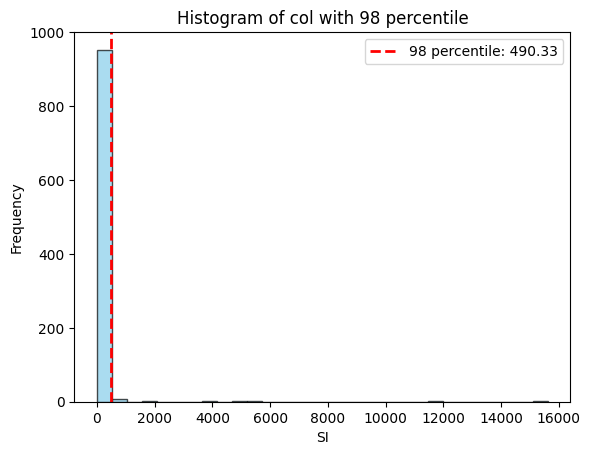

In [ ]:
df_q98 = df_drop_dublicate['SI'].quantile(0.98)

plt.hist(df_drop_dublicate['SI'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q98, color='red', linestyle='dashed', linewidth=2, label=f'98 percentile: {df_q98:.2f}')
plt.title('Histogram of col with 98 percentile')
plt.xlabel('SI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Удаляем строки, где значение "IC50, mM", "CC50, mM" и "SI" выше 98 перцентиля
for col in ['IC50, mM', 'CC50, mM', 'SI']:
    if col in df_drop_dublicate.columns:
        q98 = df_drop_dublicate[col].quantile(0.98)
        df_q98 = df_drop_dublicate[df_drop_dublicate[col] <= q98]

df_q98.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 1000
Columns: 195 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(88)
memory usage: 1.4 MB


In [ ]:
# Сохранение в файл
df_q98.to_csv('Обработанный.csv', index=False)